In [252]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import pickle

print(tf.__version__)

2.2.0


In [319]:

df = pd.read_csv ('Dataset1.csv')
df_shuffled = df.sample(frac=1).reset_index(drop=True)
print (df_shuffled)

                                          INTENT  ID Unnamed: 2
0                  Halt dictation near bold text  22        NaN
1                       Please go to next bullet  20        NaN
2                               remove subscript  11        NaN
3                       Start inserting bullets   19        NaN
4                           please open commands  24        NaN
..                                           ...  ..        ...
423  pause dictation near the word which is bold  22        NaN
424                         Please undo the text   1        NaN
425                     Kindly go to next bullet  20        NaN
426                        please stop dictation  23        NaN
427                   please undo last paragraph   1        NaN

[428 rows x 3 columns]


In [320]:
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [321]:
for index, row in df_shuffled.iterrows():

    tts_string=row['INTENT']
    tts_string=tts_string.lower() #lower case

    #lemmatize, then remove stopwords
    lemmatizer=WordNetLemmatizer()
    lemmatised_string=word_tokenize(tts_string)
    tts_string=""
    for word in lemmatised_string:
        tts_string=tts_string+lemmatizer.lemmatize(word)+" "
    tts_string=tts_string.strip()
    print(tts_string)

    #remove stopwords
    tokens = word_tokenize(tts_string)
    result = [i for i in tokens if not i in STOPWORDS]
    
    
    custom_stopwords = ['please','could','kindly']
    # using list comprehension to perform task 
    result = [i for i in result if i not in custom_stopwords] 


    print(result)
    
    preprocessed_str=""
#     print("here",preprocessed_str)
    for i in result:
        preprocessed_str=preprocessed_str+" "+i
#     preprocessed_str=' '.join(map(str, result))  
    print(preprocessed_str)
    preprocessed_str=preprocessed_str.strip()
    # row['INTENT']=preprocessed_string

    #remove certain words
    #lemmatization
    #convert digits to numerals
    #text canonicalization?

    df_shuffled.at[index,'INTENT']=preprocessed_str

remove formatting from 5 line above
['remove', 'formatting', '5', 'line']
 remove formatting 5 line
make the selected word bold
['make', 'selected', 'word', 'bold']
 make selected word bold
insert a superscript symbol
['insert', 'superscript', 'symbol']
 insert superscript symbol
please align in the middle
['align', 'middle']
 align middle
align the table in the middle
['align', 'table', 'middle']
 align table middle
unbold the selected text
['unbold', 'selected', 'text']
 unbold selected text
start next bullet
['start', 'next', 'bullet']
 start next bullet
stop dictation near underlined word
['stop', 'dictation', 'near', 'underlined', 'word']
 stop dictation near underlined word
centre align the picture
['centre', 'align', 'picture']
 centre align picture
strikethrough underline style
['strikethrough', 'underline', 'style']
 strikethrough underline style
selected text should be deleted
['selected', 'text', 'deleted']
 selected text deleted
make the selected word underline
['make', 'se

undo strikethrough for first 2 character
['undo', 'strikethrough', 'first', '2', 'character']
 undo strikethrough first 2 character
can you italicize that sentence
['italicize', 'sentence']
 italicize sentence
move this paragraph to the right
['move', 'paragraph', 'right']
 move paragraph right
halt dictation here
['halt', 'dictation']
 halt dictation
please remove formatting from this page
['remove', 'formatting', 'page']
 remove formatting page
remove strike for first 2 character
['remove', 'strike', 'first', '2', 'character']
 remove strike first 2 character
pause dictation near underlined word
['pause', 'dictation', 'near', 'underlined', 'word']
 pause dictation near underlined word
align the line to the left
['align', 'line', 'left']
 align line left
please undo the selected text
['undo', 'selected', 'text']
 undo selected text
could you undo the last sentence
['undo', 'last', 'sentence']
 undo last sentence
please delete the selected text
['delete', 'selected', 'text']
 delete se

In [322]:
vocab_size = 5000
embedding_dim = 20
max_length = 10
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = 0.8

In [323]:
train_size = int(428*training_portion)
X=np.array(df_shuffled['INTENT'].to_list())
Y_arr=np.array(df_shuffled['ID'].to_list())
Y=[]
for val in Y_arr:
    d=[val]
    Y.append(d)
    
train_X = X[0: train_size]
train_Y = Y[0: train_size]

validation_X = X[train_size:]
validation_Y = Y[train_size:]

print(train_size)
print(len(train_X))
print(len(train_Y))
print(train_Y)
print(len(validation_X))
print(len(validation_Y))

342
342
342
[[18], [2], [8], [14], [14], [3], [20], [23], [14], [12], [26], [6], [1], [10], [12], [9], [25], [2], [21], [20], [24], [15], [4], [25], [16], [12], [18], [18], [5], [18], [22], [4], [26], [1], [4], [1], [11], [7], [26], [21], [23], [13], [7], [7], [26], [11], [23], [19], [3], [14], [21], [17], [12], [24], [4], [21], [21], [5], [4], [13], [23], [18], [9], [2], [13], [13], [13], [17], [24], [4], [7], [6], [16], [13], [24], [4], [21], [1], [24], [4], [13], [3], [11], [8], [20], [9], [15], [1], [6], [2], [13], [9], [15], [3], [19], [5], [22], [17], [12], [4], [12], [17], [24], [23], [26], [13], [6], [3], [1], [12], [15], [5], [23], [25], [19], [21], [13], [14], [18], [3], [25], [11], [6], [25], [5], [25], [22], [7], [16], [15], [16], [10], [17], [14], [6], [14], [24], [24], [14], [2], [18], [17], [21], [21], [14], [1], [26], [20], [1], [24], [19], [13], [23], [17], [6], [25], [23], [1], [8], [14], [4], [8], [9], [3], [3], [19], [24], [26], [18], [26], [22], [9], [22], [18], [1

In [324]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_X)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'remove': 2,
 'last': 3,
 'word': 4,
 'selected': 5,
 'text': 6,
 'align': 7,
 'dictation': 8,
 'two': 9,
 'bold': 10}

In [325]:
train_sequences = tokenizer.texts_to_sequences(train_X)
print(train_sequences[1])

[48, 5, 4, 10]


In [326]:

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

4
10
4
10
3
10


In [327]:
print(df_shuffled)

                                        INTENT  ID Unnamed: 2
0                     remove formatting 5 line  18        NaN
1                      make selected word bold   2        NaN
2                    insert superscript symbol   8        NaN
3                                 align middle  14        NaN
4                           align table middle  14        NaN
..                                         ...  ..        ...
423               underline last two character   6        NaN
424                           left align table  16        NaN
425  pause dictation near word bold underlined  22        NaN
426                             bold subscript  11        NaN
427                       left align paragraph  16        NaN

[428 rows x 3 columns]


In [328]:
print(train_padded[4])

[ 7 40 38  0  0  0  0  0  0  0]


In [329]:
validation_sequences = tokenizer.texts_to_sequences(validation_X)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

86
(86, 10)


In [330]:
validation_Y=np.array(validation_Y)
training_Y=np.array(train_Y)
print(validation_Y.shape)
print(training_Y.shape)

(86, 1)
(342, 1)


In [331]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
#     use ReLU in place of tanh function since they are very good alternatives of each other.
#     tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(27, activation='softmax')
])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 20)          100000    
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 40)                6560      
_________________________________________________________________
dense_19 (Dense)             (None, 27)                1107      
Total params: 107,667
Trainable params: 107,667
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 60
history = model.fit(train_padded, training_Y, epochs=num_epochs, validation_data=(validation_padded, validation_Y), verbose=2)

Epoch 1/60
11/11 - 1s - loss: 3.2935 - accuracy: 0.0673 - val_loss: 3.2890 - val_accuracy: 0.0349
Epoch 2/60
11/11 - 0s - loss: 3.2806 - accuracy: 0.0643 - val_loss: 3.2834 - val_accuracy: 0.0465
Epoch 3/60
11/11 - 0s - loss: 3.2671 - accuracy: 0.1140 - val_loss: 3.2761 - val_accuracy: 0.0698
Epoch 4/60
11/11 - 0s - loss: 3.2487 - accuracy: 0.1637 - val_loss: 3.2661 - val_accuracy: 0.0698
Epoch 5/60
11/11 - 0s - loss: 3.2224 - accuracy: 0.1316 - val_loss: 3.2557 - val_accuracy: 0.0465
Epoch 6/60
11/11 - 0s - loss: 3.1848 - accuracy: 0.0994 - val_loss: 3.2443 - val_accuracy: 0.0465
Epoch 7/60
11/11 - 0s - loss: 3.1379 - accuracy: 0.0965 - val_loss: 3.2280 - val_accuracy: 0.0465
Epoch 8/60
11/11 - 0s - loss: 3.0658 - accuracy: 0.1287 - val_loss: 3.1592 - val_accuracy: 0.1279
Epoch 9/60
11/11 - 0s - loss: 2.9339 - accuracy: 0.1813 - val_loss: 3.0413 - val_accuracy: 0.1279
Epoch 10/60
11/11 - 0s - loss: 2.7732 - accuracy: 0.1550 - val_loss: 2.9514 - val_accuracy: 0.1047
Epoch 11/60
11/11 -

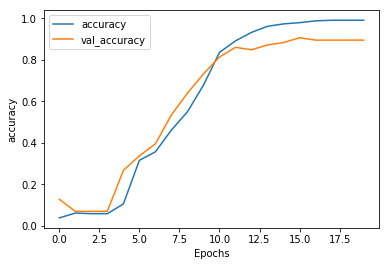

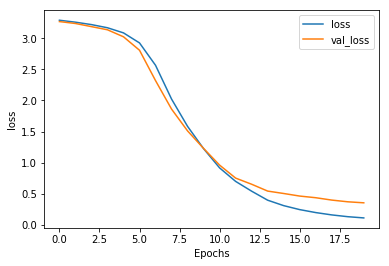

In [65]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [157]:
accr = model.evaluate(validation_padded,validation_Y)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3/3 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8605


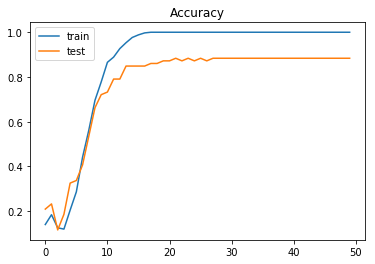

In [46]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [117]:
model.save('models/lstms_3f')

INFO:tensorflow:Assets written to: models/lstms_3f/assets


In [118]:
model.save('weights/lstm1')

INFO:tensorflow:Assets written to: weights/lstm1/assets


In [332]:
new_commands = [['Halt dictation near bold text'],['Please go to next bullet'],['remove subscript'],['Start inserting bullet'],['please open commands'],['can you undo this'],['remove the underline here'],['align content left'],['please bold that'],['underline please'],['right align the text please'],['can you make it in italics'],['please make this italic'],['can you remove the subscript'],['move text right'],['strikethrough the last text'],['show help please'],['insert a bullet here']]



In [333]:
new_commands_processed=[]
    
for i,ele in enumerate(new_commands):

    tts=ele[0]
    print(tts)
    tts=tts.lower() #lower case

    #lemmatize, then remove stopwords
    lemmatizer=WordNetLemmatizer()
    lemmatised_string=word_tokenize(tts)
    tts=""
    for word in lemmatised_string:
        tts=tts+lemmatizer.lemmatize(word)+" "
    tts=tts.strip()
    # print(tts_string)

    #remove stopwords
    tokens = word_tokenize(tts)
    result = [i for i in tokens if not i in STOPWORDS]
    
    
    custom_stopwords = ['please','could','kindly']
    # using list comprehension to perform task 
    result = [i for i in result if i not in custom_stopwords] 

    
    print(result)
    preprocessed_string=""
    for i in result:
        preprocessed_string=preprocessed_string+" "+i
#     preprocessed_string= ' '.join(map(str, result)) 
    print(preprocessed_string)
    preprocessed_string=preprocessed_string.strip()
    str0=[preprocessed_string]
#     d=[val]
    new_commands_processed.append(str0)
#     new_commands[i]=preprocessed_string
    # row['INTENT']=preprocessed_string

    #remove certain words
    #lemmatization
    #convert digits to numerals
    #text canonicalization?

    

# print(new_commands')
    

Halt dictation near bold text
['halt', 'dictation', 'near', 'bold', 'text']
 halt dictation near bold text
Please go to next bullet
['go', 'next', 'bullet']
 go next bullet
remove subscript
['remove', 'subscript']
 remove subscript
Start inserting bullet
['start', 'inserting', 'bullet']
 start inserting bullet
please open commands
['open', 'command']
 open command
can you undo this
['undo']
 undo
remove the underline here
['remove', 'underline']
 remove underline
align content left
['align', 'content', 'left']
 align content left
please bold that
['bold']
 bold
underline please
['underline']
 underline
right align the text please
['right', 'align', 'text']
 right align text
can you make it in italics
['make', 'italic']
 make italic
please make this italic
['make', 'italic']
 make italic
can you remove the subscript
['remove', 'subscript']
 remove subscript
move text right
['move', 'text', 'right']
 move text right
strikethrough the last text
['strikethrough', 'last', 'text']
 strikethr

In [280]:
print(new_commands_processed)

[['bold'], ['underline'], ['make italic'], ['make italic'], ['remove subscript'], ['move text right'], ['strikethrough last text'], ['show help'], ['insert bullet']]


In [273]:
print(new_commands)

print(label_list)


[['please bold that'], ['underline please'], ['can you make it in italics'], ['please make this italic'], ['can you remove the subscript?'], ['move text right'], ['strikethrough the last text'], ['show help please'], ['insert a bullet here']]
['', 'UNDO', 'BOLD', 'REMOVE_BOLD', 'ITALIC', 'REMOVE_ITALIC', 'UNDERLINE', 'REMOVE_UNDERLINE', 'SUPERSCRIPT', 'REMOVE_SUPERSCRIPT', 'SUBSCRIPT', 'REMOVE_SUBSCRIPT', 'STRIKETHROUGH', 'REMOVE_STRIKETHROUGH', 'DELETE', 'REMOVE_FORMATTING', 'INSERT_COMMENT', 'ALIGN_LEFT', 'ALIGN_RIGHT', 'ALIGN_CENTER', 'INSERT_BULLET', 'NEXT_BULLET', 'END_BULLET', 'PAUSE_DICTATION', 'STOP_DICTATION', 'SHOW_HELP', 'SHOW_ALL_COMMANDS']


In [334]:
label={'0':'','1':'UNDO','2':'BOLD','3':'REMOVE_BOLD','4':'ITALIC','5':'REMOVE_ITALIC','6':'UNDERLINE','7':'REMOVE_UNDERLINE','8':'SUPERSCRIPT','9':'REMOVE_SUPERSCRIPT','10':'SUBSCRIPT','11':'REMOVE_SUBSCRIPT','12':'STRIKETHROUGH','13':'REMOVE_STRIKETHROUGH','14':'DELETE','15':'REMOVE_FORMATTING','16':'INSERT_COMMENT','17':'ALIGN_LEFT','18':'ALIGN_RIGHT','19':'ALIGN_CENTER','20':'INSERT_BULLET','21':'NEXT_BULLET','22':'END_BULLET','23':'PAUSE_DICTATION','24':'STOP_DICTATION','25':'SHOW_ALL_COMMANDS','26':'SHOW_HELP'}
label_list=list_values = [ v for v in label.values() ]
# print(new_commands_processed)
for dum in new_commands_processed :
    print(dum)
    sequences = tokenizer.texts_to_sequences(dum)
#     print(sequences)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    print(padded)
    # seq = tokenizer.texts_to_sequences()
    # padded = pad_sequences(seq, maxlen=max_length)
    # print(padded)
    pred = model.predict(padded)
    print(np.argmax(pred),"\n")
#     print(pred)

['halt dictation near bold text']
[[75  8 24 10  6  0  0  0  0  0]]
7 

['go next bullet']
[[69 35 11  0  0  0  0  0  0  0]]
7 

['remove subscript']
[[ 2 25  0  0  0  0  0  0  0  0]]
7 

['start inserting bullet']
[[42 77 11  0  0  0  0  0  0  0]]
21 

['open command']
[[43 30  0  0  0  0  0  0  0  0]]
11 

['undo']
[[13  0  0  0  0  0  0  0  0  0]]
21 

['remove underline']
[[ 2 12  0  0  0  0  0  0  0  0]]
7 

['align content left']
[[ 7 65 34  0  0  0  0  0  0  0]]
7 

['bold']
[[10  0  0  0  0  0  0  0  0  0]]
21 

['underline']
[[12  0  0  0  0  0  0  0  0  0]]
21 

['right align text']
[[27  7  6  0  0  0  0  0  0  0]]
5 

['make italic']
[[48 26  0  0  0  0  0  0  0  0]]
7 

['make italic']
[[48 26  0  0  0  0  0  0  0  0]]
7 

['remove subscript']
[[ 2 25  0  0  0  0  0  0  0  0]]
7 

['move text right']
[[54  6 27  0  0  0  0  0  0  0]]
14 

['strikethrough last text']
[[15  3  6  0  0  0  0  0  0  0]]
7 

['show help']
[[39 31  0  0  0  0  0  0  0  0]]
21 

['insert bullet']